# 03 Random Networks

## Contents

01. [Introduction](#0301-Introduction)
02. [The Random Network Model](#0302-The-Random-Network-Model)
    * [Box 3-1 Defining Random Networks](#Box-3-1-Defining-Random-Networks)
    * [Box 3-2 Random Networks - a Brief History](#Box-3-2-Random-Networks---a-Brief-History)
03. [Number of Links](#0303-Number-of-Links)
    * [Box 3-3 Binomial Distribution - Mean and Variance](#Box-3-3-Binomial-Distribution---Mean-and-Variance)
04. [Degree Distribution](#0304-Degree-Distribution)
05. [Real Networks are Not Poisson](#0305-Real-Networks-are-Not-Poisson)
06. [The Evolution of a Random Network](#0306-The-Evolution-of-a-Random-Network)
07. [Real Networks are Supercritical](#0307-Real-Networks-are-Supercritical)
08. [Small World](#0308-Small-World)
09. [Clustering Coefficient](#0309-Clustering-Coefficient)
    * [Box 3-9 Watts-Strogatz Model](#Box-3-9-Watts-Strogatz-Model)

In [2]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import networkx as nx

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print(
"""{}-{}-{} {}:{}:{}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}
----------------------
networkx\t{}"""
    .format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, matplotlib.__version__, IPython.__version__, nx.__version__))

2019-3-28 14:8:25
----------------------
numpy		1.15.2
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0
----------------------
networkx	2.2


## 03.02 The Random Network Model

G(N,L)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


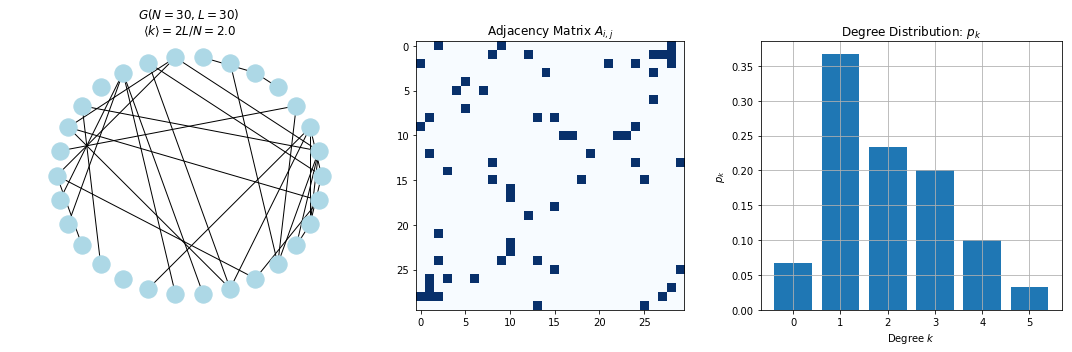

In [2]:
# num of edges
N = 30
# num of nodes
L = 30

seedN=123

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

G = nx.gnm_random_graph(N, L, seed=seedN)

nx.draw_circular(G, ax=axes[0], node_color='lightblue')
axes[0].set_title(r'$G(N={}, L={})$' '\n' r'$\langle k \rangle = 2L/N = {}$'.format(N, L, np.round(2*L/N, 3)))

A = nx.to_numpy_matrix(G)
# A = nx.adjacency_matrix(G)
B = nx.incidence_matrix(G)
axes[1].imshow(A, cmap='Blues')
axes[1].set_title('Adjacency Matrix ' r'$A_{i,j}$')

deg = nx.degree_histogram(G)
d = [d/N for d in deg]
axes[2].bar(range(len(d)), d)
axes[2].set_title('Degree Distribution: ' r'$p_k$')
axes[2].set_xlabel('Degree ' r'$k$')
axes[2].set_ylabel(r'$p_k$')
axes[2].grid(True)
# axes[2].hist(nx.degree(G).values)

plt.tight_layout()
plt.show()
# print(type(B))

G(N,p)

In [4]:
# num of edges
N = 30
# num of probability
p = .3
# seed
seedN=123

def random_graph(N, p, seedN):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

    if 0 <= p and p <= 1:
        G = nx.gnp_random_graph(N, p, seed=seedN)
        nx.draw_circular(G, ax=axes[0], node_color='lightblue')
        print(nx.degree_histogram(G))
        axes[0].set_title('Random graph:\n' r'$G(N={}, p={})$'.format(N, p))
    
        #A = nx.adjacency_matrix(G)
        A = nx.to_numpy_matrix(G)
        #print(mat)
        axes[1].imshow(A, cmap='Blues')
        axes[1].set_title('Adjacency Matrix: ' r'$A_{i,j}$')
        
        deg = nx.degree_histogram(G)
        d = [d/N for d in deg]
        axes[2].bar(range(len(d)), d)
        axes[2].set_title('Degree Distribution: ' r'$p_k$')
        axes[2].set_xlabel('Degree ' r'$k$')
        axes[2].set_ylabel(r'$p_k$')
        axes[2].grid(True)
        
    else:
        print('p must be [0,1]')

# random_graph(N, p, seedN)
# plt.tight_layout()
# plt.show()

Erdős-Rényi network

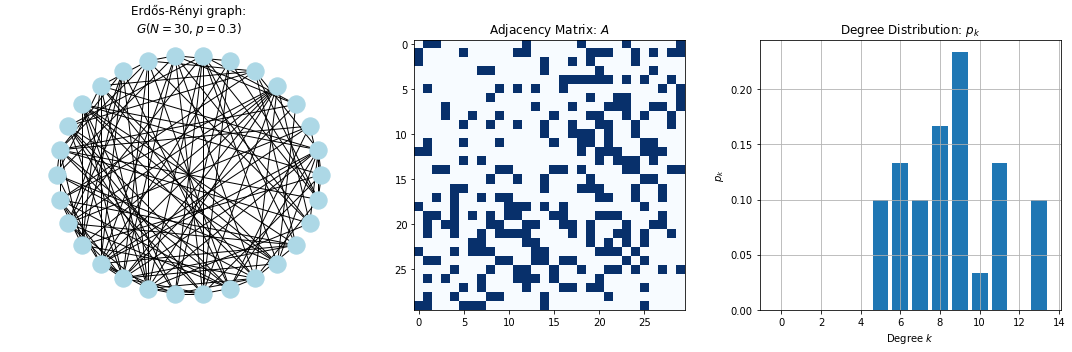

In [5]:
N = 30
p = .3
seedN = 321

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

G = nx.erdos_renyi_graph(N, p, seedN)
# print(nx.degree_histogram(G))
nx.draw_circular(G, ax=axes[0], node_color='lightblue')
axes[0].set_title('Erdős-Rényi graph:\n' r'$G(N={}, p={})$'.format(N, p))

A = nx.to_numpy_matrix(G)
axes[1].imshow(A, cmap='Blues')
axes[1].set_title('Adjacency Matrix: ' r'$A$')

deg = nx.degree_histogram(G)
d = [d/N for d in deg]
axes[2].bar(range(len(d)), d)
axes[2].grid(True)
axes[2].set_title('Degree Distribution: ' r'$p_k$')
axes[2].set_xlabel('Degree ' r'$k$')
axes[2].set_ylabel(r'$p_k$')

plt.tight_layout()
plt.show()

## 03.03 Number of Links

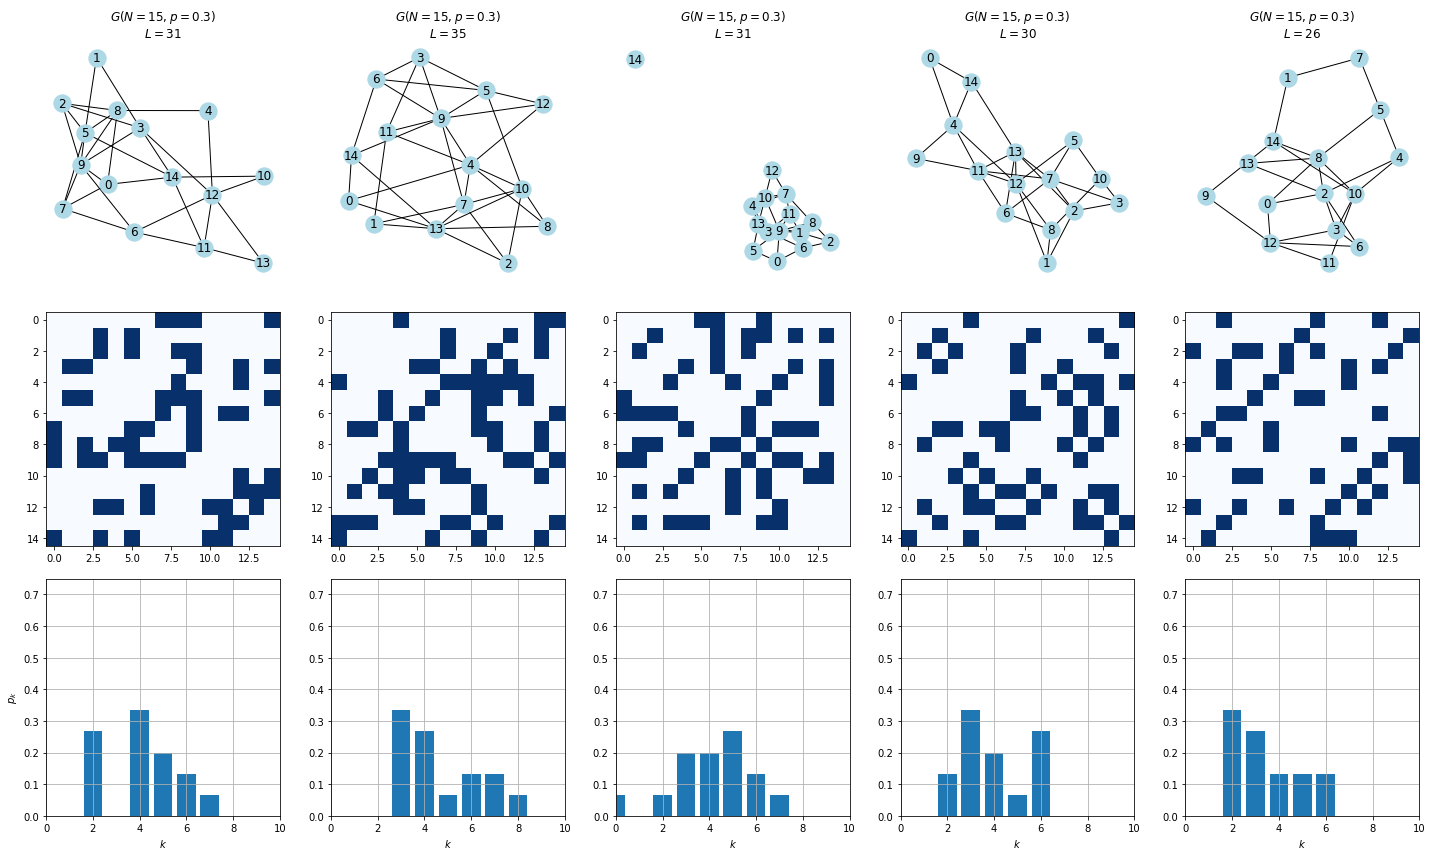

In [6]:
N = 15
p = .3

fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(20, 12))
for i in range(5):
    G = nx.gnp_random_graph(N, p)
    L = nx.number_of_edges(G)
    nx.draw_networkx(G, ax=axes[0][i], node_color='lightblue')
    axes[0][i].set_title(r'$G(N={}, p={})$' '\n' r'$L={}$'.format(N, np.round(p, 3), L))
    axes[0][i].set_axis_off()
    #nx.draw(G, node_size=80)
    
    A = nx.to_numpy_matrix(G)
    axes[1][i].imshow(A, cmap='Blues')
    
    deg = nx.degree_histogram(G)
    d = [d/N for d in deg]
    axes[2][i].bar(range(len(d)), d)
    axes[2][i].grid(True)
    axes[2][i].set_xlim(0, 10)
    axes[2][i].set_ylim(0, .75)
    axes[2][i].set_xlabel(r'$k$')

axes[2][0].set_ylabel(r'$p_k$')

plt.tight_layout()
plt.show()

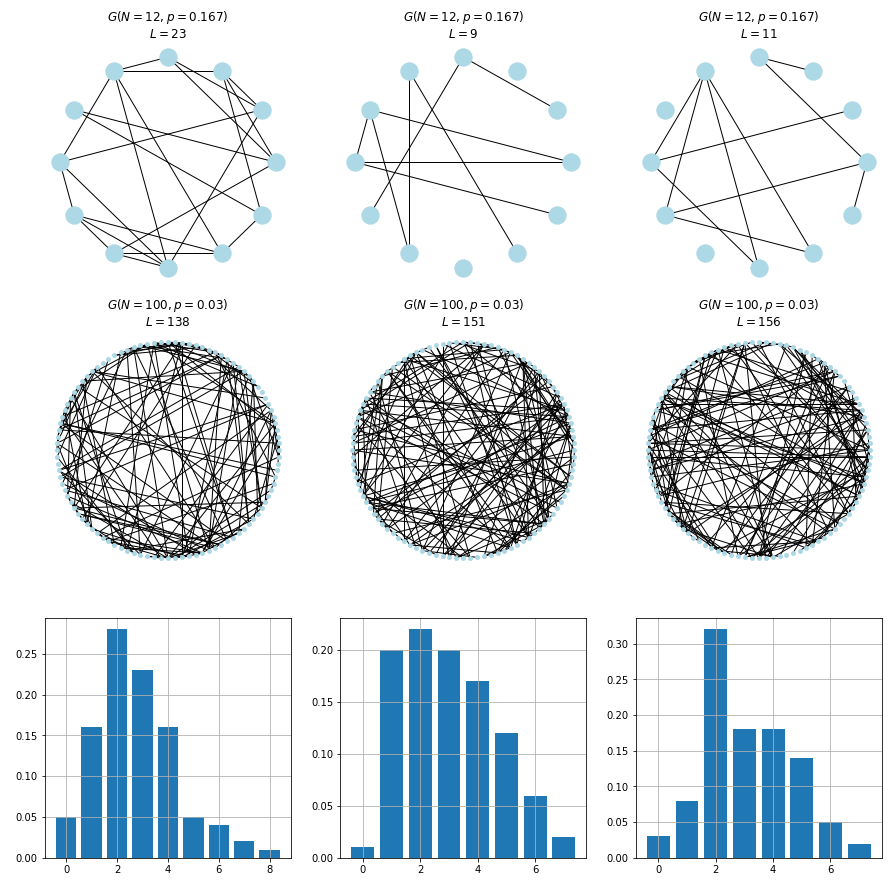

In [7]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

for i in range(3):
    N = 12
    p = 1/6
    G0 = nx.gnp_random_graph(N, p)
    nx.draw_circular(G0, ax=axes[0][i], node_color='lightblue')
    L = nx.number_of_edges(G0)
    axes[0][i].set_title(r'$G(N={}, p={})$' '\n' r'$L={}$'.format(N, np.round(p,3), L))
    axes[0][i].set_axis_off()
    
    N = 100
    p = .03
    G1 = nx.gnp_random_graph(N, p)
    nx.draw_circular(G1, ax=axes[1][i], node_color='lightblue', node_size=15)
    L = nx.number_of_edges(G1)
    axes[1][i].set_title(r'$G(N={}, p={})$' '\n' r'$L={}$'.format(N, np.round(p,3), L))
    axes[1][i].set_axis_off()
    
    deg = nx.degree_histogram(G1)
    deg = [d/N for d in deg]
    axes[2][i].bar(range(len(deg)), deg)
    axes[2][i].grid(True)

## 03.04 Degree Distribution

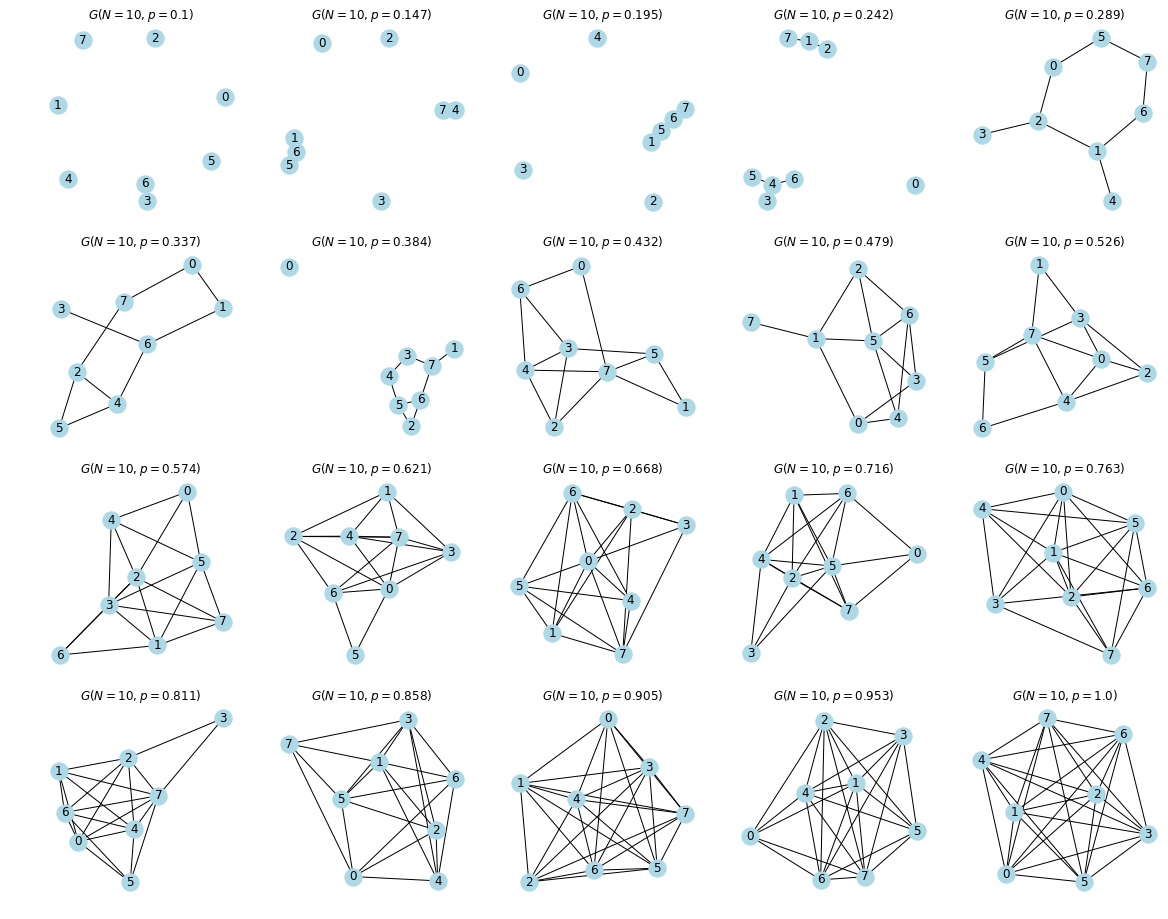

In [8]:
n = 8
ps = np.linspace(0.1, 1, 20)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
for ax, p in zip(axes.ravel(), ps):
    G = nx.gnp_random_graph(n, p)
    nx.draw_networkx(G, ax=ax, node_color='lightblue')
    ax.set_title(r'$G(N=10, p={})$'.format(np.round(p, 3)))
    ax.set_axis_off()
    #nx.draw(G, node_size=80)

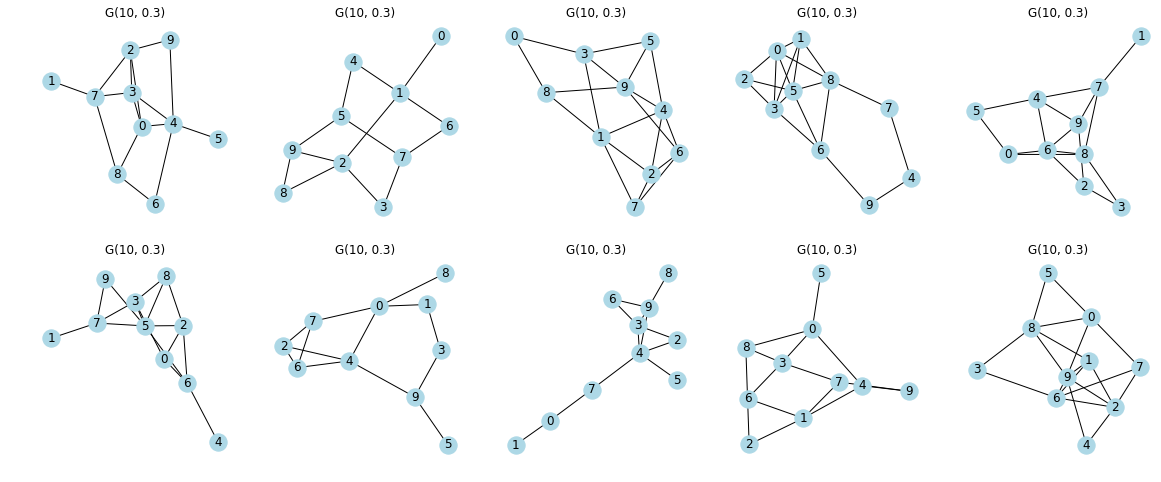

In [9]:
n = 10
p = 0.3

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for ax in axes.ravel():
    nx.draw_networkx(nx.gnp_random_graph(n, p), ax=ax, node_color='lightblue')
    ax.set_title('G(10, {})'.format(np.round(p, 3)))
    ax.set_axis_off()
    #nx.draw(G, node_size=80)

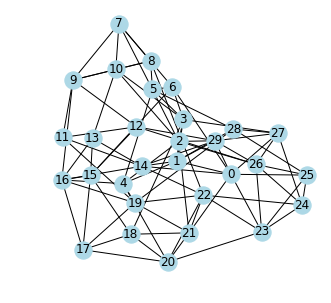

In [10]:
n = 30
k = 7
p = 0.3

fig, axes = plt.subplots(figsize=(5, 5))
G = nx.watts_strogatz_graph(n, k, p)
nx.draw_networkx(G, ax=axes, node_color='lightblue')
axes.set_axis_off()

In [ ]:
k_mean = 50

Ns = [10**2, 10**3, 10**4, 10**5]
Ns.sort(reverse=True)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 4.5))#, sharex=True, sharey=True)

for N in Ns:
    
    G = nx.gnm_random_graph(N, k_mean*N/2, seed=123)
    k = nx.degree_histogram(G)
    p_k = [d/N for d in k]
    #ax.bar(range(len(p_k)), p_k, label=r'$N={}$'.format(N))
    ax.plot(range(len(p_k)), p_k)#, label=r'$N={}$'.format(N))
    ax.scatter(range(len(p_k)), p_k, label=r'$N={}$'.format(N))
    ax.grid(True)
    #ax.set_title(r'$N={}$'.format(N))
    ax.set_xlim(20, 80)
    
plt.legend(loc='best')
plt.xlabel('Degree ' r'$k$')
plt.ylabel(r'$p_k$')
plt.tight_layout()
plt.show()

In [12]:
from scipy.special import factorial
fact = factorial(5, exact=False)
print(fact)

def Poisson_dist(n, m, k):
    G = nx.gnm_random_graph(n, m)
    ks = nx.degree_histogram(G)
    k_exps = [k_i*i for k_i, i in zip(ks, range(len(ks)))]
    k_exp = sum(k_exps)
    k_mean = k_exp/
    p_k = e**(-)

SyntaxError: invalid syntax (<ipython-input-12-bf65367257de>, line 10)

## 03.05 Real Networks are Not Poisson

In [ ]:
N = 10**4
k
p
G = nx.watts_strogatz_graph(N, k, p)

In [ ]:
N = 10**3
k_mean = 5
L_max = N*(N-1)/2
L = k_mean * N /2

p = L / L_max

## 03.06 The Evolution of a Random Network

In [29]:
N = 10**3
# Ls = np.linspace(0, N*(N-1)/2, 10**3)
p_iter = 10**4

k_mean_lim = 7
L_max = N*(N-1)/2
L = k_mean_lim * N /2
p_lim = L / L_max

k_critical = [1, np.log(N)]

ps = np.linspace(0, p_lim, p_iter)

k_means, N_G_per_Ns = [], []

for p in ps:
    G = nx.gnp_random_graph(N, p, seed=321)
    #G = nx.gnm_random_graph(N, L, seed=321)
    ks = nx.degree_histogram(G)
    k_mean = sum([k*n for k, n in zip(ks, range(len(ks)))]) / N
    
    Gc = max(nx.connected_component_subgraphs(G), key=len)
    #N_G = Gc.size()
    N_G = len(list(Gc.nodes))
    N_G_per_N = N_G / N
    
    k_means.append(k_mean)
    N_G_per_Ns.append(N_G_per_N)
    
    if np.round(k_mean, 2) == .5:
        G1 = G
        
    elif np.round(k_mean, 2) == k_critical[0]:
        G2 = G
        
    elif np.round(k_mean, 2) == 1.5:#np.round((k_critical[0]+k_critical[1])/2, 2):
        G3 = G
        
    elif np.round(k_mean, 2) == np.round(k_critical[1], 2):
        G4 = G

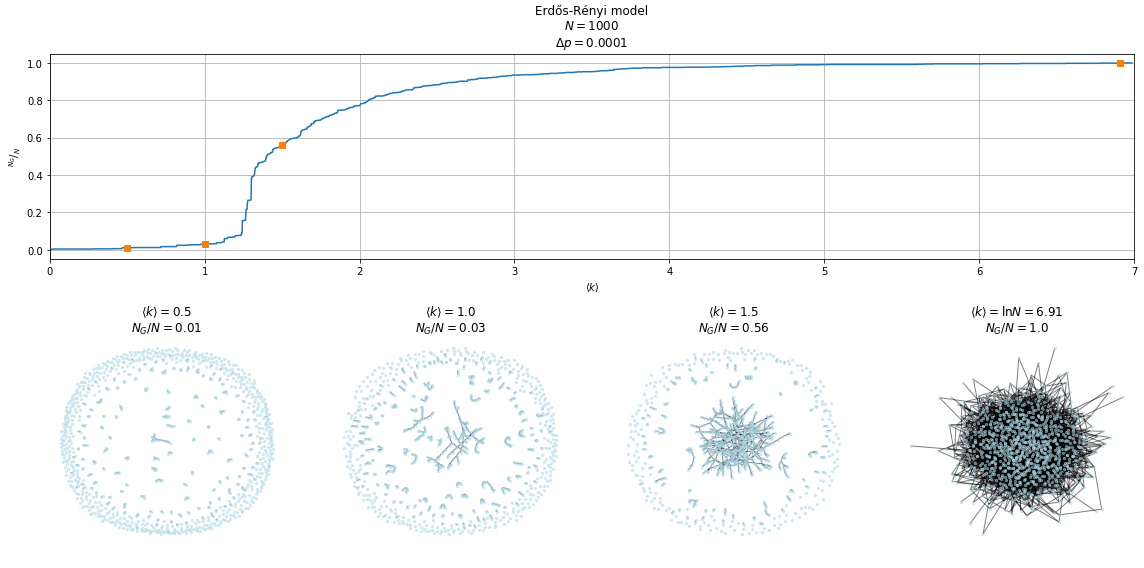

In [30]:
for k_mean, N_G_per_N in zip(k_means, N_G_per_Ns):
    if np.round(k_mean, 2) == .5:
        k_mean1 = np.round(k_mean, 2)
        N_G_per_N1 = np.round(N_G_per_N, 2)
        
    elif np.round(k_mean, 2) == k_critical[0]:
        k_mean2 = np.round(k_mean, 2)
        N_G_per_N2 = np.round(N_G_per_N, 2)
        
    elif np.round(k_mean, 2) == 1.5:#np.round((k_critical[0]+k_critical[1])/2, 2):
        k_mean3 = np.round(k_mean, 2)
        N_G_per_N3 = np.round(N_G_per_N, 2)
        
    elif np.round(k_mean, 2) == np.round(k_critical[1], 2):
        k_mean4 = np.round(k_mean, 2)
        N_G_per_N4 = np.round(N_G_per_N, 2)
        
        
"""
     0     1     2     3   
  -------------------------
0 |          ax0          |
  -------------------------
1 | ax1 | ax2 | ax3 | ax4 |
  -------------------------
"""
fig = plt.figure(figsize=(16, 8))
ax0 = plt.subplot2grid((2,4), (0,0), colspan=4)
ax1 = plt.subplot2grid((2,4), (1,0))
ax2 = plt.subplot2grid((2,4), (1,1))
ax3 = plt.subplot2grid((2,4), (1,2))
ax4 = plt.subplot2grid((2,4), (1,3))

# ax0.scatter(k_means, N_G_per_Ns)
ax0.plot(k_means, N_G_per_Ns)
ax0.set_xlabel(r'$\langle k \rangle$')
ax0.set_ylabel(r'$^{N_G}/_{N}$')
ax0.set_xlim(0, k_mean_lim)
ax0.grid(True)

ax0.plot(k_mean1, N_G_per_N1, marker='s', color='#ff7f04')
ax0.plot(k_mean2, N_G_per_N2, marker='s', color='#ff7f04')
ax0.plot(k_mean3, N_G_per_N3, marker='s', color='#ff7f04')
ax0.plot(k_mean4, N_G_per_N4, marker='s', color='#ff7f04')

nx.draw_networkx(G1, ax=ax1, alpha=.5, node_size=5, node_color='lightblue', with_labels=False)
ax1.set_title(r'$\langle k \rangle = {}$' '\n' r'$N_G / N = {}$'.format(k_mean1, N_G_per_N1))
ax1.set_axis_off()

nx.draw_networkx(G2, ax=ax2, alpha=.5, node_size=5, node_color='lightblue', with_labels=False)
ax2.set_title(r'$\langle k \rangle = {}$' '\n' r'$N_G / N = {}$'.format(k_mean2, N_G_per_N2))
ax2.set_axis_off()

nx.draw_networkx(G3, ax=ax3, alpha=.5, node_size=5, node_color='lightblue', with_labels=False)
ax3.set_title(r'$\langle k \rangle = {}$' '\n' r'$N_G / N = {}$'.format(k_mean3, N_G_per_N3))
ax3.set_axis_off()

nx.draw_networkx(G4, ax=ax4, alpha=.5, node_size=5, node_color='lightblue', with_labels=False)
ax4.set_title(r'$\langle k \rangle = \ln N = {}$' '\n' r'$N_G / N = {}$'.format(k_mean4, N_G_per_N4))
ax4.set_axis_off()

ax0.set_title('Erdős-Rényi model\n' r'$N={}$' '\n' r'$\Delta p = {}$'.format(N, 1/p_iter))

plt.tight_layout()
plt.savefig('img/fig_03_07_2.png')
plt.show()

In [26]:
print('N = {}'.format(N))
print('ln(N) = {}'.format(np.round(np.log(N), 3)))

N = 1000
ln(N) = 6.908


### Box 3.5

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


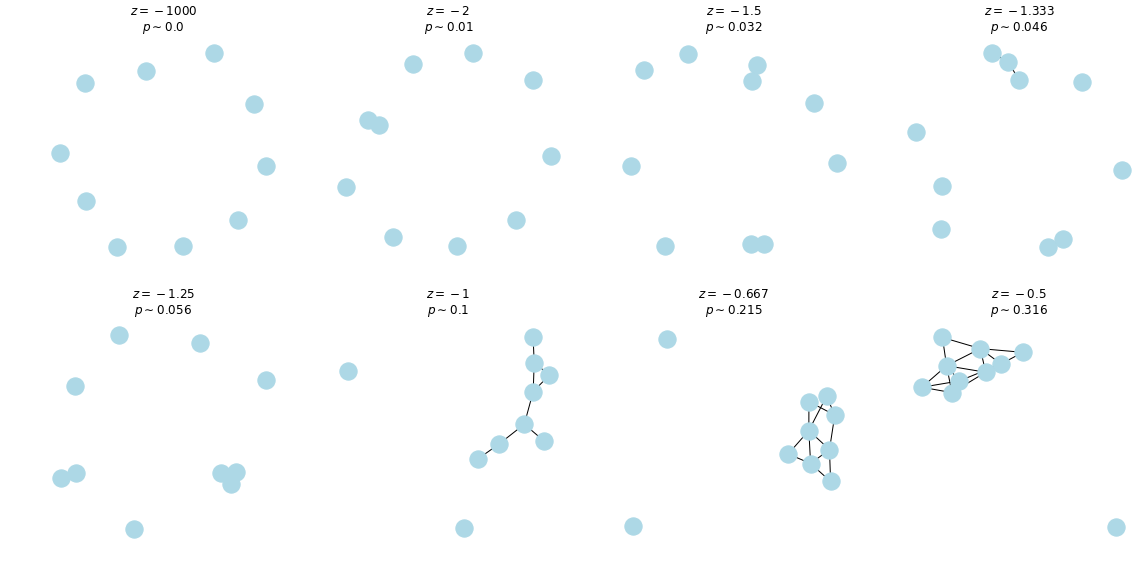

In [36]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))

N = 10
zs = [-1000, -2, -3/2, -4/3, -5/4, -1, -2/3, -1/2]

for z, ax in zip(zs, axs.ravel()):
    p = N**z
    G = nx.gnp_random_graph(N, p, seed=123)
    nx.draw_networkx(G, ax=ax, node_color='lightblue', with_labels=False)
    ax.set_title(r'$z = {}$' '\n' r'$p\sim{}$'.format(np.round(z, 3), np.round(p, 3)))
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('img/fig_03_08.png')
plt.show()

## 03.08 Small World

In [4]:
N_max = 5*10**2
Ns = np.arange(1, N_max+1, 1)
p = .7
d_means, d_means_1d, d_means_2d, d_means_3d = [], [], [], []

for N in Ns:
    G = nx.gnp_random_graph(np.int_(N), p, seed=321)
    d_mean = nx.average_shortest_path_length(G)
    d_means.append(d_mean)
    
    G_1d = nx.grid_graph(dim=[N])
    d_mean_1d = nx.average_shortest_path_length(G_1d)
    d_means_1d.append(d_mean_1d)


ns_2d = np.arange(1, np.int_(np.round(np.sqrt(N_max), 0)), 1)
Ns_2d = [n**2 for n in ns_2d]
for n in ns_2d:
    G_2d = nx.grid_graph(dim=[n, n])
    d_mean_2d = nx.average_shortest_path_length(G_2d)
    d_means_2d.append(d_mean_2d)
    
ns_3d = np.arange(1, np.int_(np.round(np.cbrt(N_max), 0)), 1)
Ns_3d = [n**3 for n in ns_3d]
for n in ns_3d:
    G_3d = nx.grid_graph(dim=[n, n, n])
    d_mean_3d = nx.average_shortest_path_length(G_3d)
    d_means_3d.append(d_mean_3d)

# fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(8, 4.5))

# axs.plot(Ns, d_means, label='Random')
# axs.plot(Ns, d_means_1d, label='1D')
# axs.plot(Ns_2d, d_means_2d, label='2D')
# axs.plot(Ns_3d, d_means_3d, label='3D')

# axs.set_xlabel(r'$N$')
# axs.set_ylabel(r'$\langle d \rangle$')
# axs.grid(True)
# axs.legend(loc='best')
# plt.tight_layout()
# plt.show()

# print(Ns)

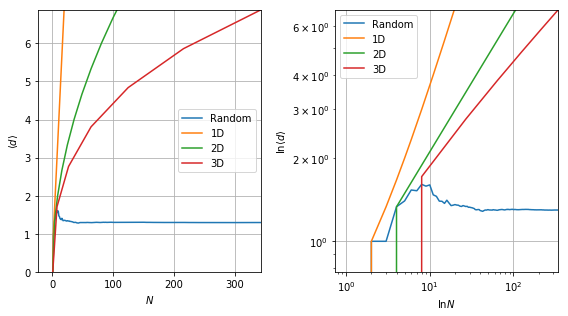

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4.5))

axs[0].plot(Ns, d_means, label='Random')
axs[0].plot(Ns, d_means_1d, label='1D')
axs[0].plot(Ns_2d, d_means_2d, label='2D')
axs[0].plot(Ns_3d, d_means_3d, label='3D')

axs[0].set_xlabel(r'$N$')
axs[0].set_ylabel(r'$\langle d \rangle$')
axs[0].grid(True)
axs[0].legend(loc='best')

axs[0].set_xlim(right=np.max(Ns_3d))
axs[0].set_ylim(0, np.max(d_means_3d))

axs[1].plot(Ns, d_means, label='Random')
axs[1].plot(Ns, d_means_1d, label='1D')
axs[1].plot(Ns_2d, d_means_2d, label='2D')
axs[1].plot(Ns_3d, d_means_3d, label='3D')

axs[1].set_xlabel(r'$\ln{N}$')
axs[1].set_ylabel(r'$\ln{\langle d \rangle}$')
axs[1].grid(True)
axs[1].legend(loc='best')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[1].set_xlim(right=np.max(Ns_3d))
axs[1].set_ylim(top=np.max(d_means_3d))

plt.tight_layout()
plt.savefig('img/fig_03_11_2.png')
plt.show()

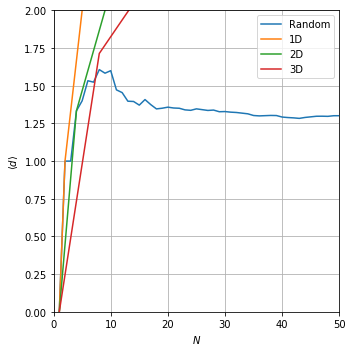

In [22]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))

axs.plot(Ns, d_means, label='Random')
axs.plot(Ns, d_means_1d, label='1D')
axs.plot(Ns_2d, d_means_2d, label='2D')
axs.plot(Ns_3d, d_means_3d, label='3D')

axs.set_xlabel(r'$N$')
axs.set_ylabel(r'$\langle d \rangle$')
axs.grid(True)
axs.legend(loc='best')

axs.set_xlim(0, 50)
axs.set_ylim(0, 2)


plt.tight_layout()
plt.savefig('img/fig_03_11_3.png')
plt.show()

## 03.09 Clustering Coefficient

### Box 3-9 Watts-Strogatz Model

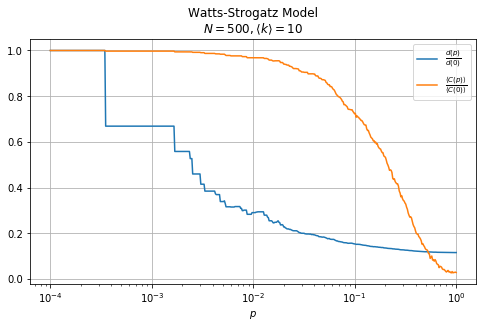

In [42]:
N = 500
ps = 10**np.linspace(-4, 0, 500)
# p = .5
k = 10
ds, Cs = [], []

d0 = nx.average_shortest_path_length(
    nx.watts_strogatz_graph(N, k, 0, seed=123))
C0 = nx.average_clustering(
    nx.watts_strogatz_graph(N, k, 0, seed=123))

for p in ps:
    G = nx.watts_strogatz_graph(N, k, p, seed=123)
    
    d = nx.average_shortest_path_length(G)
    ds.append(d)
    
    C = nx.average_clustering(G)
    Cs.append(C)
    
dpd0 = [d/d0 for d in ds]
CpC0 = [C/C0 for C in Cs]

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(8, 4.5))

axs.plot(ps, dpd0, label=r'$\frac{d(p)}{d(0)}$')
axs.plot(ps, CpC0, label=r'$\frac{\langle C(p) \rangle}{\langle C(0) \rangle}$')
axs.grid(True)
axs.set_title('Watts-Strogatz Model\n' r'$N={}, \langle k \rangle={}$'.format(N, k))
axs.legend(loc='best')
axs.set_xscale('log')
axs.set_xlabel(r'$p$')
plt.savefig('img/fig_03_14.png')
plt.show()

# nx.draw_circular(G, ax=axs, with_label=False, node_color='lightblue')
# axs.set_axis_off()
# print('d(p)={}'.format(d_0))

In [ ]:
ps = [10**i for i in np.linspace(-4, 0, 100)]
N = 100

G = nx.gnp_random_graph

In [ ]:
N, p = 30, .7

G = nx.gnp_random_graph(N, p)

C_mean = nx.average_clustering(G)
print(C_mean)